In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
from numpy import percentile
import numpy as np

In [3]:
# Pergunta: Há um maior beneficiado com a criação do MERCOSUL?
# Hipótese: A argentina, por ser o país com maior GDP per capita no ano da criação do MERCOSUL(1990), foi a mais beneficiada 
# com a criação do bloco. 
# Mecanismo: Ela foi a mais beneficiada pois conseguiu mercado consumidor para seus produtos, aumentando seu GDP per capita 
# nos anos que se seguiram após a criação do bloco

In [4]:
gdp = pd.read_excel('GDPpercapitaconstant2000US.xlsx')
gdp_1990 = gdp.loc[:,['Income per person (fixed 2000 US$)', "1990"]]
gdp_index = gdp_1990.set_index('Income per person (fixed 2000 US$)')
gdp_index

,1990
Income per person (fixed 2000 US$),
Abkhazia,NaN
Afghanistan,NaN
Akrotiri and Dhekelia,NaN
Albania,977.765530
Algeria,1832.743369
American Samoa,NaN
Andorra,16070.065766
Angola,372.794513
Anguilla,NaN


In [5]:
region = pd.read_excel('landlocked_region.xlsx')
region_index = region.set_index('Country')
region_index

,region,landlocked
Country,,
Albania,europe_east,0
Algeria,africa_north,0
Angola,africa_sub_saharan,0
Antigua and Barbuda,america_north,0
Argentina,america_south,0
Armenia,europe_east,1
Australia,east_asia_pacific,0
Austria,europe_west,1
Azerbaijan,europe_east,1


In [6]:
region_gdp = gdp_index.join(region_index,how='inner')
region_gdp

,1990,region,landlocked
Albania,977.765530,europe_east,0
Algeria,1832.743369,africa_north,0
Angola,372.794513,africa_sub_saharan,0
Antigua and Barbuda,9454.021246,america_north,0
Argentina,5581.962341,america_south,0
Armenia,795.378905,europe_east,1
Australia,17553.376842,east_asia_pacific,0
Austria,19192.071721,europe_west,1
Azerbaijan,1250.740064,europe_east,1
Bahamas,19970.508334,america_north,0


In [7]:
region_gdp.loc[(region_gdp['region']=='america_south')]

,1990,region,landlocked
Argentina,5581.962341,america_south,0
Bolivia,871.226077,america_south,1
Brazil,3352.965403,america_south,0
Chile,3067.650580,america_south,0
Colombia,2324.843633,america_south,0
Ecuador,1299.211204,america_south,0
Guyana,609.914422,america_south,0
Paraguay,1396.742875,america_south,1
Peru,1664.248311,america_south,0
Suriname,2049.598226,america_south,0


In [8]:
gdp_indexado = gdp.set_index('Income per person (fixed 2000 US$)')
gdp_paises = gdp_indexado.T
gdp_1960 = gdp_paises.loc[:,['Argentina','Brazil','Uruguay','Paraguay']]
gdp_ano_index = gdp_1960.T
gdp_ano_index = gdp_ano_index.loc[:,['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001']]
gdp_1990 = gdp_ano_index.T
gdp_1990

Income per person (fixed 2000 US$),Argentina,Brazil,Uruguay,Paraguay
1990,5581.962341,3352.965403,5253.942903,1396.742875
1991,6203.445662,3347.811473,5401.617022,1394.924917
1992,6851.752586,3279.686396,5788.057622,1406.982974
1993,7162.093421,3380.128392,5898.529062,1426.760892
1994,7483.560918,3506.544107,6281.936354,1445.128954
1995,7179.938826,3606.005917,6146.711025,1488.949911
1996,7484.004016,3627.626996,6465.206609,1461.484586
1997,7994.115547,3693.275820,6973.363589,1472.343823
1998,8205.474590,3639.181673,7249.309766,1449.257221
1999,7839.514938,3594.869820,7076.216877,1397.892359


In [9]:
paises_ricos = region_gdp.loc[(region_gdp['1990']>=5581)]
paises_ricos['region'].value_counts()

europe_west           19
east_asia_pacific      6
asia_west              5
america_north          4
europe_east            2
america_south          1
africa_sub_saharan     1
Name: region, dtype: int64

In [10]:
gdp_indexado = gdp.set_index('Income per person (fixed 2000 US$)')
gdp_paises = gdp_indexado.T
gdp_america = gdp_paises.loc[:,['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela']]
gdp_paises_index = gdp_america.T
gdp_paises_index = gdp_paises_index.loc[:,['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001']]
gdp_1990_paises = gdp_paises_index.T
gdp_1990_paises

Income per person (fixed 2000 US$),Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela
1990,5581.962341,871.226077,3352.965403,3067.650580,2324.843633,1299.211204,609.914422,1396.742875,1664.248311,2049.598226,5253.942903,4823.487126
1991,6203.445662,896.197065,3347.811473,3252.581050,2332.361881,1336.352827,647.740512,1394.924917,1666.742865,2075.384035,5401.617022,5175.666615
1992,6851.752586,890.010419,3279.686396,3585.435758,2403.772309,1327.249289,698.306768,1406.982974,1627.865570,2042.457183,5788.057622,5366.577735
1993,7162.093421,906.681968,3380.128392,3766.798632,2415.206674,1303.469895,754.315655,1426.760892,1673.751133,1869.147610,5898.529062,5263.645046
1994,7483.560918,927.428366,3506.544107,3912.849555,2509.615733,1337.833423,816.757138,1445.128954,1854.116253,1904.528996,6281.936354,5029.950337
1995,7179.938826,949.154703,3606.005917,4258.237391,2592.710818,1336.079949,855.802354,1488.949911,1978.016368,1899.803103,6146.711025,5119.602561
1996,7484.004016,968.931038,3627.626996,4504.721321,2599.008309,1344.586764,921.988811,1461.484586,1992.578021,1897.926240,6465.206609,5005.250067
1997,7994.115547,995.210835,3693.275820,4734.564150,2641.021632,1376.516189,978.389964,1472.343823,2093.207824,1979.643179,6973.363589,5218.154035
1998,8205.474590,1023.377496,3639.181673,4822.819463,2610.185487,1383.787635,960.732192,1449.257221,2045.292819,1983.027653,7249.309766,5132.015852
1999,7839.514938,1006.586485,3594.869820,4984.101800,2458.021358,1276.486467,987.861018,1397.892359,2031.631231,1938.935483,7076.216877,4733.817832


In [11]:
perc_gdp = gdp_1990_paises.T['2001']/gdp_1990_paises.T['1990']

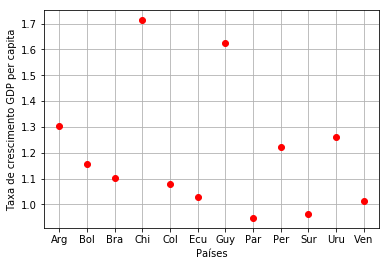

In [12]:
import matplotlib.pyplot as plt
paises_plt = ['Arg','Bol','Bra','Chi','Col','Ecu','Guy','Par','Per','Sur','Uru','Ven']
plt.plot(paises_plt,perc_gdp,'ro')
plt.xlabel('Países')
plt.ylabel('Taxa de crescimento GDP per capita')
plt.grid(True)
plt.show()

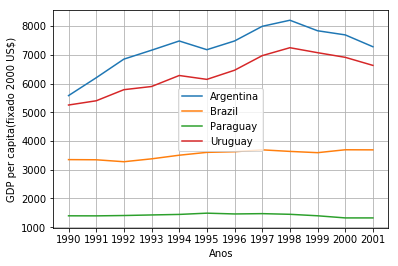

In [52]:
anos = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001']
anos_plt = [0]*12
i=0
for k in gdp_1990_paises:
    #for l in range(0,len(anos_plt)):
        #anos_plt[l] = anos[i]
    if k=='Argentina' or k=='Brazil' or k=='Uruguay' or k=='Paraguay':
        plt.plot(anos,gdp_1990_paises[k],label='{}'.format(k))
    i+=1
plt.xlabel('Anos')
plt.ylabel('GDP per capita(fixado 2000 US$)')
plt.grid(True)
plt.legend()
plt.show()

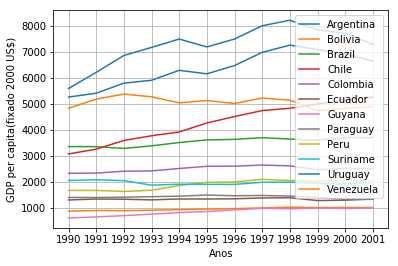

In [54]:
for k in gdp_1990_paises:
    #for l in range(0,len(anos_plt)):
        #anos_plt[l] = anos[i]
    plt.plot(anos,gdp_1990_paises[k],label='{}'.format(k))
    i+=1
plt.xlabel('Anos')
plt.ylabel('GDP per capita(fixado 2000 US$)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# http://observatoriogeograficoamericalatina.org.mx/egal12/Geografiasocioeconomica/Geografiaeconomica/05.pdf
# http://lephe.fflch.usp.br/sites/lephe.fflch.usp.br/files/upload/paginas/ARtigo_Rev.Ec_.CO_.pdf

# Há vários artigos que dizem que o desenvolvimento da Argentina foi reduzido há influências externas no país.
# Além disso, os índices de dívida externa e desemprego estavam em alta na maior da parte da década de 1990 na Argentina.
# Assim pode se observar que houve um crescimento do GDO per capita, porém ele foi causado a um crescimento da economia 
# da América e do mundo, não um caso em que a Argentina de fato estava passando por um período de crescimento econômico especial